## Assignments

The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore [the seaborn documentation](http://seaborn.pydata.org/index.html).

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    + Choose one variable and plot that variable four different ways.
    + Choose two continuous variables, and plot them three different ways.
    + Choose one continuous variable and one categorical variable, and plot them six different ways.
    + Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

## import modulues and data, process data

In [210]:
#get dataset from airbnb databse
import psycopg2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# Connect to an existing database
conn = psycopg2.connect(dbname="air_bnb_data",
                        host="142.93.121.174",
                        password="7*.8G9QH21",
                        user="dsbc_student",
                        port="5432")

# Open a cursor to perform database operations
cur = conn.cursor()

#write query
query = """
SELECT
  to_number( price, regexp_replace( replace(price,',','G') , '[0-9]' ,'9','g') ) AS price,
  CASE WHEN 
    EXTRACT(MONTH FROM cal.calender_date) IN (1,2,3) 
    THEN 'winter' 
    WHEN EXTRACT(MONTH FROM cal.calender_date) IN (4,5,6) 
    THEN 'spring' 
    WHEN EXTRACT(MONTH FROM cal.calender_date) IN (7,8,9) 
    THEN 'summer' 
    ELSE 'fall' 
    END
    AS season,
  cal.calender_date,
  listing_id,
  EXTRACT(MONTH FROM cal.calender_date) as month,
  available::bool AS avail  
FROM sfo_calendar_abbreviated AS cal
WHERE price IS NOT null
ORDER BY price DESC
;"""

# use SELECT qry
cur.execute(query)
airbnb_records = cur.fetchall() 

In [286]:
#pull query results into dataframe
season_df = pd.DataFrame(airbnb_records)
season_df.columns = ["price", 'season', 'date','listing_id', 'month', 'available']
season_df['price'] = pd.to_numeric(season_df['price'])
season_df['available'] = season_df['available']*1 #change bool to binary T/F

#create groups based on month
season_gp_df = season_df.groupby(['month', 'listing_id', 'season']).agg({'available': np.mean,
                                                               'price': np.mean})
#how to get season? it is a string and numerica aggregation functions not working...
season_gp_df = season_gp_df.reset_index()

#add count of instances to new column
season_count_df = season_df.groupby(['month', 'listing_id']).count()['price'].reset_index()
season_count_df.columns.values[2] = "count"
#why merge is needed?
season_gp_df = pd.merge(season_gp_df, season_count_df, on=['month', 'listing_id'])
season_gp_df.head()

,month,listing_id,season,available,price,count
0,1.0,19642407,winter,1,87.129032,31
1,1.0,19658833,winter,1,152.580645,31
2,1.0,19659835,winter,1,162.000000,27
3,1.0,19680922,winter,1,105.000000,31
4,1.0,19694250,winter,1,1900.000000,8


In [252]:
winter_p = season_df.loc[season_df['season'] == 'winter', :]['price']
spring_p = season_df.loc[season_df['season'] == 'spring', :]['price']
summer_p = season_df.loc[season_df['season'] == 'summer', :]['price']
autumn_p = season_df.loc[season_df['season'] == 'fall', :]['price']

#way to automate creation of variable names? is this better than slice function in plotting function?
autumn_p.head()

8     500.0
9     500.0
10    500.0
11    483.0
12    483.0
Name: price, dtype: float64

## Create various plots in Seaborn

* Choose one variable and plot that variable four different ways.
* Choose two continuous variables, and plot them three different ways.
* Choose one continuous variable and one categorical variable, and plot them six different ways.
* Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

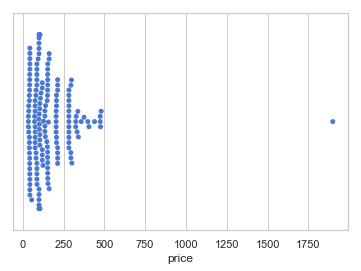

In [216]:
#Choose one variable and plot that variable four different ways.

sns.set(style="whitegrid", palette="muted")
sns.swarmplot( x="price", #y="month",
              hue="month",
              palette="muted", data=season_gp_df)

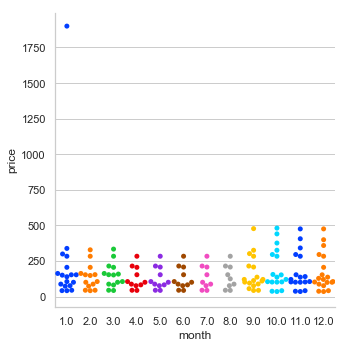

In [222]:
sns.catplot( x="month", y="price",
            kind="swarm", hue="month",
             palette="bright", data=season_gp_df);


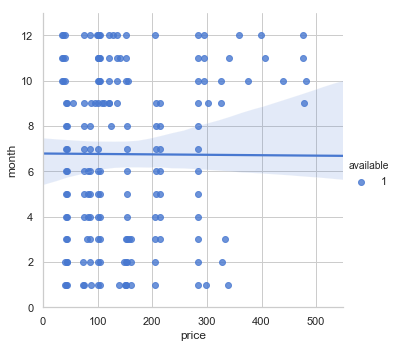

In [170]:
lm = sns.lmplot(x='price', y='month', data=season_gp_df, hue="available")
lm.set(xlim=(0, 550),
      ylim=(0,13))


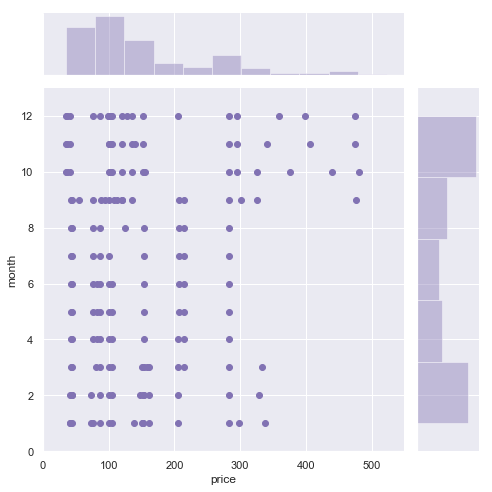

In [99]:
sns.set(style="darkgrid")
g = sns.jointplot("price", "month", data=season_gp_df, 
                  xlim=(0, 550), ylim=(0, 13), color="m", height=7)


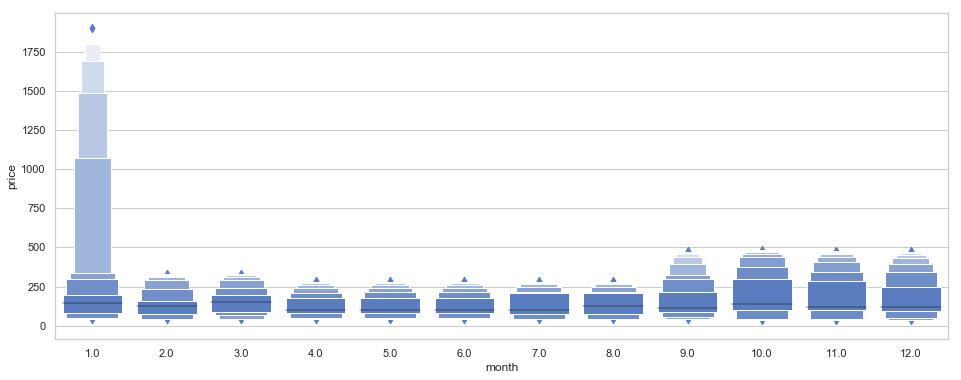

In [171]:
plt.figure(figsize=(16, 6))

Fourth = sns.boxenplot(x="month", y="price",
              color="b", 
              scale="linear", data=season_gp_df)



c:\users\chris\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


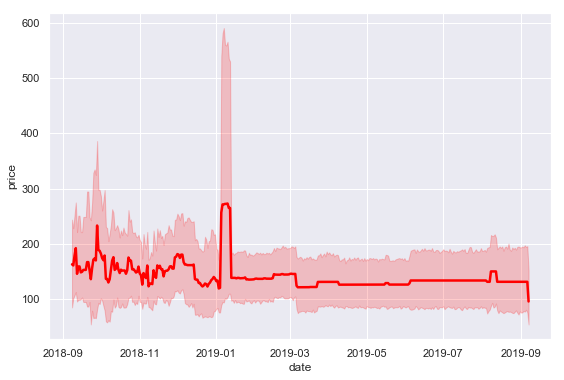

In [136]:
# Choose two continuous variables, and plot them three different ways.

f, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(data=season_df, x='date',
             y='price', color='red', linewidth=2.5)

#registering converters???

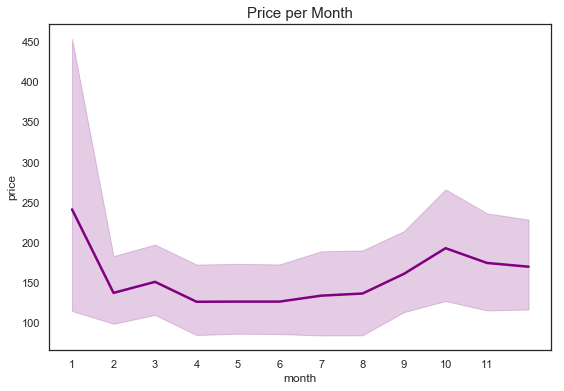

In [469]:
f, ax = plt.subplots(figsize=(9, 6))

ax = sns.lineplot(data=season_gp_df, x='month',
             y='price', color='purple', linewidth=2.5)

ax.set_title('Price per Month', size=15);
#add ticks:
plt.xticks(np.arange(1, 12, 1));



I'm not sure why this is rounding x axis to the nearest x%2=0 month?

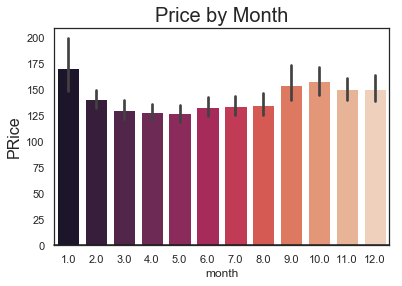

In [327]:
ax3 = sns.barplot(x='month', y='price', palette="rocket", data=season_df)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("PRice", size=16)
ax3.set_title("Price by Month", size=20);


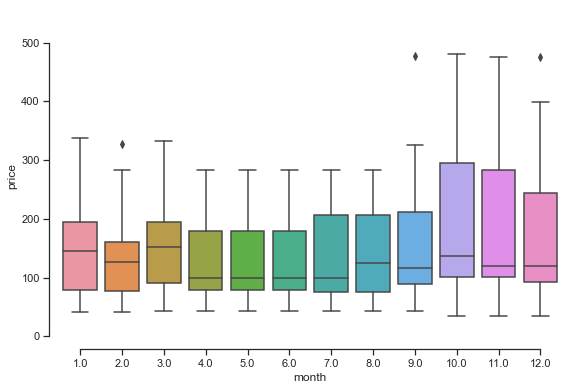

In [290]:
f, ax5 = plt.subplots(figsize=(9, 6))

sns.set(style="ticks", palette="pastel")

ax5 = sns.boxplot(x="month", y="price",
            data=season_gp_df)
ax5.set_ylim([-5, 550])      
ax5 = sns.despine(offset=10, trim=True)
#despine has to go after set_ylim
# can't get y limit set??

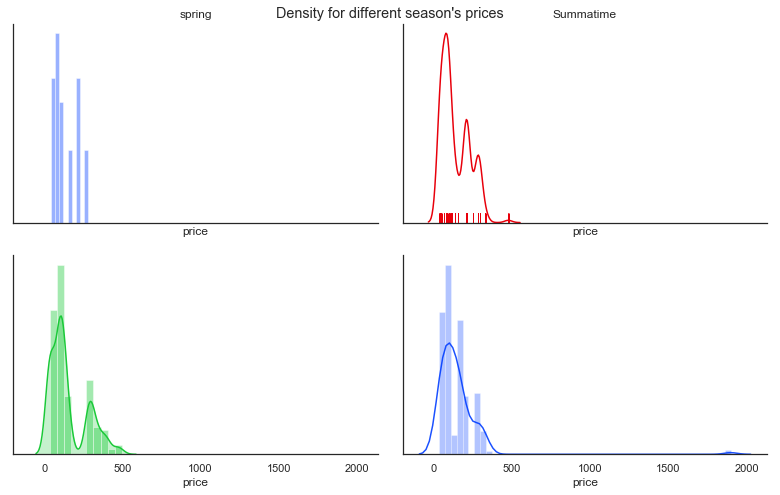

In [353]:
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11, 7), sharex=True)
plt.suptitle("Density for different season's prices")

sns.despine(left=False)

# Plot a simple histogram with binsize determined automatically
ax4 = sns.distplot(spring_p, kde=False, color="b", ax=axes[0, 0])
ax4.set_title('spring')  #?? not appearing

# Plot a kernel density estimate and rug plot
ax5 = sns.distplot(summer_p, hist=False, rug=True, color="r", ax=axes[0, 1])
ax5.set_title('Summatime')  #?? not appearing

# Plot a filled kernel density estimate
sns.distplot(autumn_p, hist=True, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(winter_p, color="b", kde_kws={"alpha": .9}, hist_kws={"alpha": .3},
             ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()
#rewrite as fascet plot

''

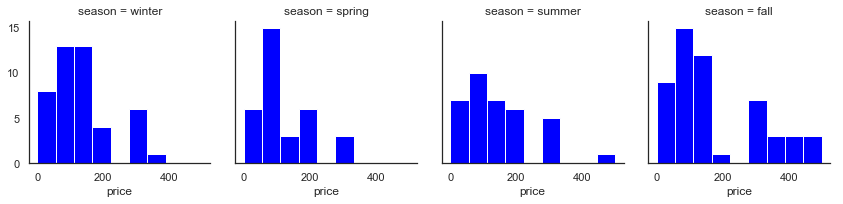

In [348]:
g = sns.FacetGrid(season_gp_df, col="season", margin_titles=True)
bins = np.linspace(0,500,10)
g.map(plt.hist, 'price', color="blue", bins=bins)
;

In [324]:
#pivot daata
month_price_ct_df = season_df.groupby(['month', 'price'])['available'].count().reset_index()
month_price_ct_df['p_range'] = pd.cut(month_price_ct_df[month_price_ct_df['price'] <550 ]['price'], 5)
month_price_ct_df = month_price_ct_df.groupby(['month', 'p_range'])['available'].sum().reset_index()
month_price_pivot_df = month_price_ct_df.pivot(index='month', columns='p_range', values='available')
month_price_pivot_df.head()

p_range  (34.535, 128.0]  (128.0, 221.0]  (221.0, 314.0]  (314.0, 407.0]  \
month                                                                      
1.0                197.0           133.0            53.0             4.0   
2.0                183.0           140.0            28.0            28.0   
3.0                186.0            87.0            31.0             5.0   
4.0                202.0            90.0            30.0             NaN   
5.0                214.0            93.0            31.0             NaN   

p_range  (407.0, 500.0]  
month                    
1.0                 NaN  
2.0                 NaN  
3.0                 NaN  
4.0                 NaN  
5.0                 NaN  

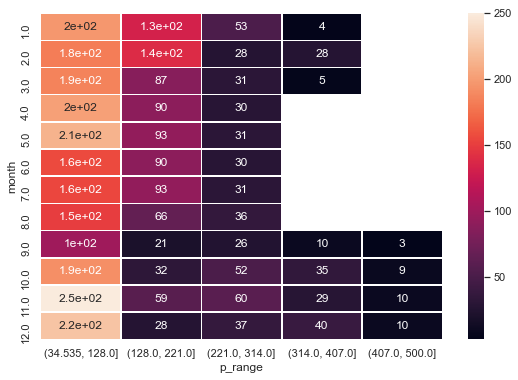

In [325]:
f, ax6 = plt.subplots(figsize=(9, 6))
sns.heatmap(month_price_pivot_df, annot=True,  linewidths=.5, ax=ax6);


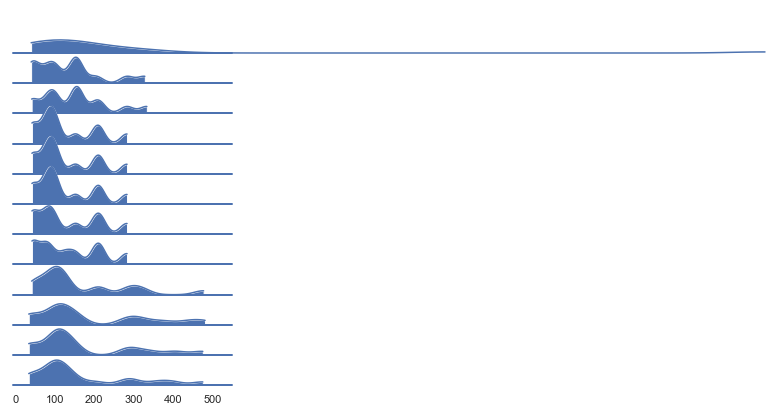

In [381]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(season_gp_df, row="month",  aspect=8, height=.5, palette=pal)
# Draw the densities in a few steps
g.map(sns.kdeplot, "price", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)
plt.xlim([-5, 550])      


# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);


Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups
* Accompany your plot with a written description of what you see.

In [413]:
conn = psycopg2.connect(dbname="air_bnb_data",
                        host="142.93.121.174",
                        password="7*.8G9QH21",
                        user="dsbc_student",
                        port="5432")

query2 = """
SELECT
  id,
  neighbourhood AS ngh,
  room_type,
  price,
  minimum_nights AS min_ngt,
  availability_365::int AS avail,
  number_of_reviews AS no_revs
FROM 
  sfo_listings AS lst
;
"""

In [414]:
cur2 = conn.cursor()

cur2.execute(query2)
airbnb_records2 = cur2.fetchall() 


In [423]:
air2_df = pd.DataFrame(airbnb_records2)
air2_df.columns = ['id', 'neigh', 'room_type', 'price', 'min_ngt', 'avail', 'no_revs']
air2_df.head()


,id,neigh,room_type,price,min_ngt,avail,no_revs
0,958,Western Addition,Entire home/apt,170.0,1,122,152
1,5858,Bernal Heights,Entire home/apt,235.0,30,365,112
2,7918,Haight Ashbury,Private room,65.0,32,365,17
3,8142,Haight Ashbury,Private room,65.0,32,328,7
4,8339,Western Addition,Entire home/apt,675.0,7,78,26


In [453]:
air2_gp_df = air2_df.groupby(['neigh', 'room_type']).agg({'price': np.mean,
                                                         'min_ngt': np.mean,
                                                         'avail': np.mean,
                                                         'no_revs': np.sum})
air2_gp_df.head()

price    min_ngt       avail  no_revs
neigh          room_type                                                  
Bayview        Entire home/apt  170.250000  16.571429  155.464286     2576
               Private room     113.342466  11.534247  176.945205     3809
               Shared room       52.000000   1.000000  352.000000       87
Bernal Heights Entire home/apt  215.987124  11.463519  117.763948     9630
               Private room     105.890511   6.751825  127.532847     8660

In [459]:
air2_gp_df.reset_index(inplace=True)
air2_gp_df['no_revs'] = air2_gp_df['no_revs'].astype(float)


In [460]:
air2_gp_df.dtypes

index          int64
neigh         object
room_type     object
price        float64
min_ngt      float64
avail        float64
no_revs      float64
dtype: object

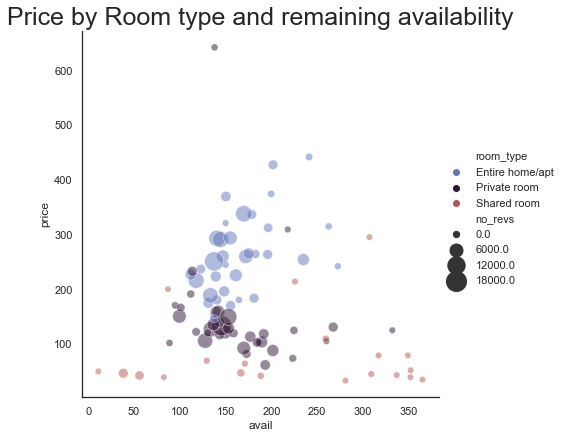

In [493]:
sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="avail", y="price", hue="room_type", size="no_revs",
            sizes=(40, 400), alpha=.5, palette="twilight",
            height=6, data=air2_gp_df)
plt.title("Price by Room type and remaining availability", size=25);

In [472]:
#bin the availability data into deciles
air2_gp_df['avail_dec'] = pd.cut(air2_gp_df['avail'], 10)
air2_gp_df.head()


,index,neigh,room_type,price,min_ngt,avail,no_revs,avail_dec
0,0,Bayview,Entire home/apt,170.250000,16.571429,155.464286,2576.0,"(152.6, 188.0]"
1,1,Bayview,Private room,113.342466,11.534247,176.945205,3809.0,"(152.6, 188.0]"
2,2,Bayview,Shared room,52.000000,1.000000,352.000000,87.0,"(329.6, 365.0]"
3,3,Bernal Heights,Entire home/apt,215.987124,11.463519,117.763948,9630.0,"(117.2, 152.6]"
4,4,Bernal Heights,Private room,105.890511,6.751825,127.532847,8660.0,"(117.2, 152.6]"


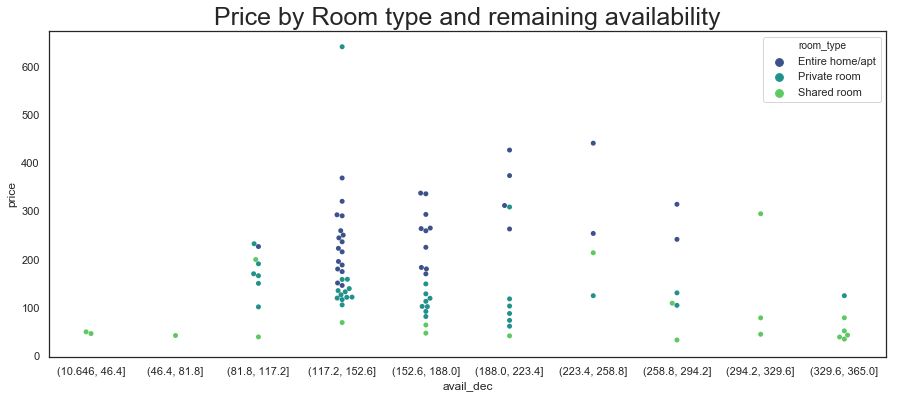

In [488]:
f, ax7 = plt.subplots(figsize=(15, 6))

sns.swarmplot(x="avail_dec", y="price", hue="room_type",
              #size="no_revs",
              palette="viridis",
              #dodge=True,
              data=air2_gp_df)
plt.title("Price by Room type and remaining availability", size=25);